In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("../processed-data.csv")
df

,Date,Value,MovingAvg,RMA,RMA_Pred,PercAvg_Pred,ES-0.3,ES-0.6,ES-0.9,MonteCarlo_Pred,ARIMA-OPT,SARIMA-OPT,ARIMA-UNOPT,SARIMA-UNOPT,LINREG,SVR-UNOPT,SVR-OPT
0,2010-01-01,388.91,NaN,NaN,NaN,407.037443,388.910000,388.910000,388.910000,NaN,NaN,NaN,NaN,NaN,388.286592,407.061283,390.198465
1,2010-02-01,390.41,NaN,NaN,NaN,407.902507,389.360000,389.810000,390.260000,NaN,388.910322,NaN,388.910494,NaN,388.495606,407.018372,390.310440
2,2010-03-01,391.37,NaN,NaN,NaN,408.657562,389.963000,390.746000,391.259000,NaN,391.396034,NaN,391.472276,NaN,388.684392,407.016578,390.414762
3,2010-04-01,392.67,NaN,NaN,NaN,410.147672,390.775100,391.900400,392.528900,NaN,391.674916,NaN,391.864898,NaN,388.893406,407.021608,390.533668
4,2010-05-01,393.21,NaN,NaN,NaN,409.564129,391.505570,392.686160,393.141890,NaN,393.125008,NaN,393.654536,NaN,389.095677,407.022140,390.652030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2025-12-01,NaN,426.379554,NaN,425.372094,407.017941,429.584139,431.612874,432.602162,433.716294,426.236910,427.786078,431.882643,427.827418,427.480004,407.199082,430.620883
192,2026-01-01,NaN,426.461183,NaN,426.433512,407.037443,429.612394,431.648120,432.641192,434.326326,427.130526,429.011098,431.891107,429.028912,427.689018,407.199082,431.020737
193,2026-02-01,NaN,426.445448,NaN,427.058400,407.902507,429.612394,431.648120,432.641192,434.294520,427.756195,429.879399,431.895758,429.905695,427.898031,407.199082,431.425344
194,2026-03-01,NaN,426.391736,NaN,427.618876,408.657562,429.589507,431.619570,432.609578,434.704744,428.593612,430.613101,431.898314,430.642857,428.086818,407.199082,431.794737


In [30]:
def plotTimeSeries(df, valueCol='Value', otherCols=None, title='CO2 Levels Over Time'):
    """    
    params:
        df: dataframe with the data
        valueCol: name of the main value column
        otherCols: list of other columns to plot
        title: plot title
    """
    plt.figure(figsize=(14, 6))
    
    # main value column
    plt.plot(df['Date'], df[valueCol], color='royalblue', linewidth=2, label=f'Actual {valueCol}')
    
    # plot other columns
    colors = sns.color_palette("Set2", len(otherCols))
    for i, col in enumerate(otherCols):
        if col in df.columns:
            plt.plot(df['Date'], df[col], color=colors[i], linewidth=2, 
                     linestyle='--', label=f'{col}')
    
    # add vertical line at last actual data point
    lastActualDate = df[~df[valueCol].isna()]['Date'].max()
    plt.axvline(x=lastActualDate, color='gray', linestyle='--', alpha=0.7)
    plt.text(lastActualDate, df[valueCol].max(), ' Predictions →', verticalalignment='top')
    
    plt.title(title, fontsize=14)
    plt.ylabel('CO2 (ppm)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    return plt


In [31]:
def plotYearlyAvg(df, valueCol='Value', otherCols=None, title='Annual CO2 Levels'):
    """
    plot yearly average CO2 levels with support for multiple data columns
    
    params:
        df: dataframe with the data
        valueCol: name of the main value column
        otherCols: list of other columns to plot
        title: plot title
    """
    dfCopy = df.copy()
    dfCopy['Year'] = pd.to_datetime(dfCopy['Date']).dt.year
    
    # prepare aggregation dictionary
    aggDict = {valueCol: 'mean'}
    for col in otherCols:
        if col in dfCopy.columns:
            aggDict[col] = 'mean'
    
    yearlyData = dfCopy.groupby('Year').agg(aggDict).reset_index()
    
    lastActualYear = dfCopy[~dfCopy[valueCol].isna()]['Year'].max()
    
    plt.figure(figsize=(14, 6))
    
    plt.plot(yearlyData['Year'], yearlyData[valueCol], 
             marker='o', color='royalblue', linewidth=2, 
             label=f'Actual {valueCol}')
    
    # plot other columns with different colors
    colors = sns.color_palette("Set2", len(otherCols))
    for i, col in enumerate(otherCols):
        if col in yearlyData.columns:
            plt.plot(yearlyData['Year'], yearlyData[col], 
                     marker='x', linestyle='--', color=colors[i], 
                     linewidth=2, label=f'{col}')
    
    # vertical line to indicate prediction boundary
    plt.axvline(x=lastActualYear, color='gray', linestyle='--', alpha=0.7)
    plt.text(lastActualYear, yearlyData[valueCol].max(), ' Predictions →', verticalalignment='top')
    
    plt.title(title, fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average CO2 (ppm)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    return plt

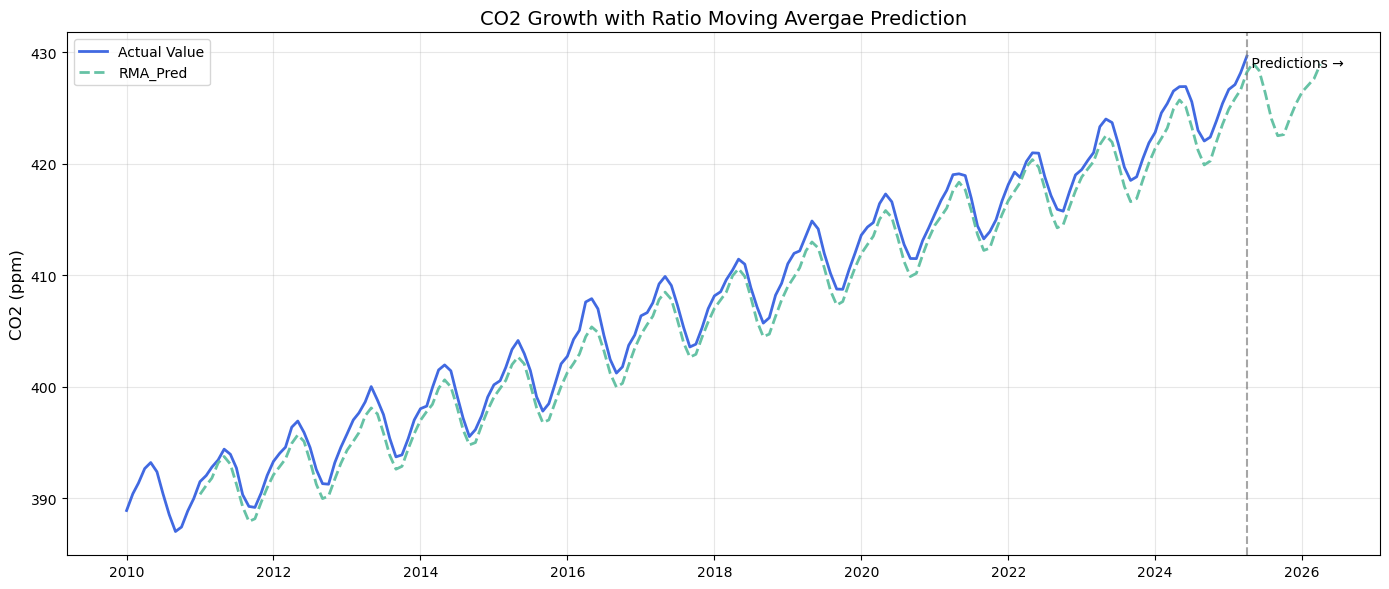

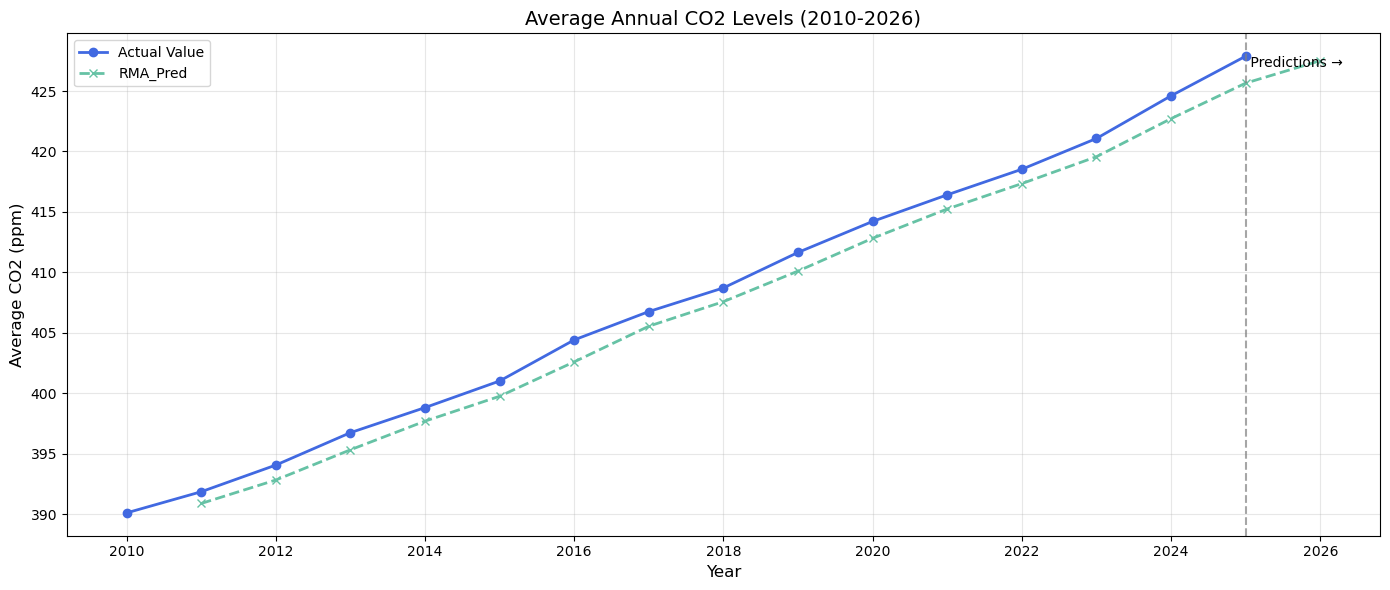

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

# colsName = ['MovingAvg', 'RMA_Pred', 'PercAvg_Pred', 'ExpSmooth', 'MonteCarlo_Pred'. 'ArimaPred', 'SarimaPred', 'LinearRegPred', 'SVM]

colsName = ['RMA_Pred']
dir = '../plots/individual/'
methodName = 'Ratio Moving Avergae'

plotTimeSeries(df, otherCols=colsName, title=f'CO2 Growth with {methodName} Prediction')
plt.savefig(f'{dir}{methodName}_CO2_growth.png')
plt.show()



df['Date'] = pd.to_datetime(df['Date'])
yearlyPlot = plotYearlyAvg(df, otherCols=colsName, title='Average Annual CO2 Levels (2010-2026)')
plt.savefig(f'{dir}{methodName}_yearly_trend_avg.png')
plt.show()